# Self-Driving Car Engineer Nanodegree
## Project: Advanced Finding Lane Lines on the Road
---

## Import packages

In [23]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.core.display import HTML
import cv2
import glob
import pickle
print (cv2.__version__)
%matplotlib inline

3.4.2


In [52]:
def showImages(list, columns, rows = 1, isGray = False):
    fig = plt.figure(figsize=(columns * 5, rows * 5))
    i = 1
    print("columns=", columns, " rows=", rows, " isGray=", isGray)
    for img in list:
        fig.add_subplot(rows, columns, i)
        i = i + 1 
        if(isGray):
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        
    plt.show()  # finally, render the plot

## Camera Calibration and disortion
**Assumptions**
-  equal size of all images

### findChessboardCorners
**find obj points and image points**
- Input folder: \camera_cal\ 
- Output fodler \camera_cal_out\
- Names: calibrationXx.jpg Xx: 1..20
- Corner : rows(6), collumns(9)

generation of ojbect points (objpoints) and image points (imgpoints)
This variables are used for a later disortion of images


In [37]:
rows = 6
columns = 9
input_folder = 'camera_cal/'
output_folder = 'output_images/calibration/'
input_file_pattern = 'calibration*.jpg'

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:rows, 0:columns].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob(input_folder + input_file_pattern)
# print(images)
#winName = "img"
# opencv.cv.cvSize
# Step through the list and search for chessboard corners

# n : number of images
# n_failed : number of images whre drawChessboardCorners failed
n = 0
n_failed = 0
img_size = None
p = True
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    # read the image size (assumption: equal size for all images)
    # this variable is uses for camera calibration later
    if img_size == None:
        img_size = (img.shape[1], img.shape[0])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    n += 1
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (rows,columns), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (rows,columns), corners, ret)
        # if p:
        #    print("------- Corners:      --------")
        #    print(corners)
        #    print("--------  END CORNERS --------")
        #    p = False
        write_name = output_folder + 'corners_found_'+str(idx)+'.jpg'
        if not(cv2.imwrite(write_name, img)):
            print("Error during save " + write_name)
    else:
        n_failed += 1
        
print("number of images: ", n)
print("number of failed drawChessboardCorners calls:", n_failed)
print("img_size", img_size)

number of images:  20
number of failed drawChessboardCorners calls: 3
img_size (1280, 720)


## Camera calibration
- use the output from drawChessboardCorners (ojbect points (objpoints) and image points (imgpoints))
- img_size
- calc the calibration values 
- save imporntend parts (mtx and dist) to: output: output_images\calibration\wide_dist_pickle.p 

In [25]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
# print("mtx: ", mtx )
# print("dist: ", dist )

# save mtx and dist
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "output_images\calibration\wide_dist_pickle.p", "wb" ) )

### Distortion and transform (the perspective)
- test pictures in : \test_images\*.jpg
- input: mtx, dist from camera calibration
- outputs
    1) disorted: output_images\test_images\disorted
    2) disorted and wrapped: output_images\test_images\disorted_new_perspective


#### Undistortion


In [31]:
input_folder = 'test_images/'
output_folder = 'output_images/test_images/disorted/'
input_file_pattern = '*.jpg'

# Make a list of test images
images = glob.glob(input_folder + input_file_pattern)
# print(images)
for idx, fname in enumerate(images):
    print(fname)
    img = cv2.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    write_name = output_folder + 'undistorted_'+str(idx)+'.jpg'
    print(write_name)
    if not(cv2.imwrite(write_name, undist)):
        print("error by save", write_name)
    print("")

test_images\straight_lines1.jpg
output_images/test_images/disorted/undistorted_0.jpg

test_images\straight_lines2.jpg
output_images/test_images/disorted/undistorted_1.jpg

test_images\test1.jpg
output_images/test_images/disorted/undistorted_2.jpg

test_images\test2.jpg
output_images/test_images/disorted/undistorted_3.jpg

test_images\test3.jpg
output_images/test_images/disorted/undistorted_4.jpg

test_images\test4.jpg
output_images/test_images/disorted/undistorted_5.jpg

test_images\test5.jpg
output_images/test_images/disorted/undistorted_6.jpg

test_images\test6.jpg
output_images/test_images/disorted/undistorted_7.jpg



#### transfrom 

In [66]:
# use the data from the write up desciption
# 585, 460 	320, 0
# 203, 720 	320, 720
# 1127, 720 	960, 720
# 695, 460 	960, 0
src = np.float32([[585, 460], [203, 720], [1127, 720], [695, 460]])
dst = np.float32([[320, 0], [320, 720], [960, 720], [960, 0]])

src: [[ 585.  460.]
 [ 203.  720.]
 [1127.  720.]
 [ 695.  460.]]
dst [[320.   0.]
 [320. 720.]
 [960. 720.]
 [960.   0.]]
columns= 2  rows= 1  isGray= False


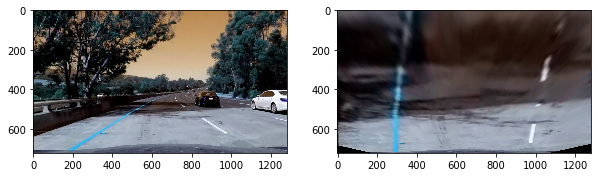

In [67]:
y1_org = 540
y2_org = 451
x1_org = 474
x2_org = 592
x3_org = 841
x4_org = 693

x1_2_persp = 530
y1_persp = 545
x3_4_persp = 730
y2_persp = 450

# src = np.float32([[x1_org, y1_org], [x2_org, y2_org], [x3_org, y1_org], [x4_org, y2_org]])
print("src:", src)

# dst = np.float32([[x1_2_persp, y1_persp], [x1_2_persp, y2_persp ], [x3_4_persp, y1_persp], [x3_4_persp, y2_persp]])
print("dst", dst)
M = cv2.getPerspectiveTransform(src, dst)


img = cv2.imread("output_images/test_images/disorted/undistorted_6.jpg")
warped = cv2.warpPerspective(img, M, img_size)
cv2.imwrite("output_images/test_images/disorted/warped_undistorted_6.jpg", warped)
images = [img, warped]
showImages(images,2)




